Test data shape: (12000, 3072)
Test labels shape: (12000, 10)
375/375 - 3s - 8ms/step - accuracy: 0.5895 - loss: 3.1566
测试集损失: 3.1565654277801514
测试集准确率: 0.5895000100135803
375/375 - 3s - 8ms/step - accuracy: 0.5895 - loss: 3.1566

Test accuracy: 0.5895000100135803
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
              precision    recall  f1-score   support

           0       0.04      0.01      0.01      1200
           1       1.00      0.99      0.99      1200
           2       0.71      0.48      0.57      1200
           3       0.53      1.00      0.69      1200
           4       1.00      1.00      1.00      1200
           5       0.35      1.00      0.51      1200
           6       0.11      0.00      0.00      1200
           7       1.00      0.80      0.89      1200
           8       0.34      0.26      0.30      1200
           9       0.42      0.36      0.39      1200

    accuracy                           0.59     12000
   macro avg       0.55      0.59      0.54

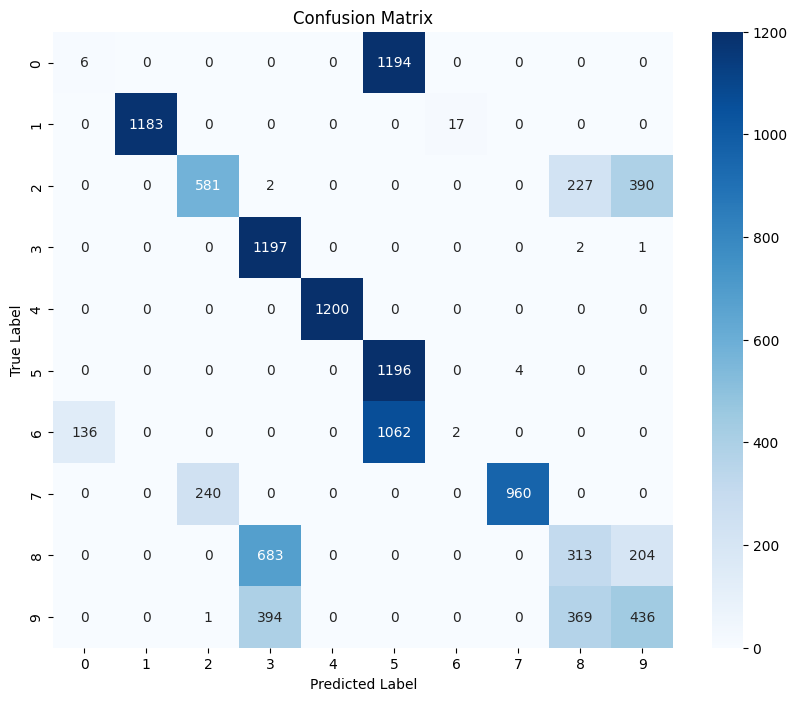

In [1]:
import scipy.io
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

def load_data_from_mat(path):
    train_data = []
    train_labels = []
    test_data = []
    test_labels = []

    for file in os.listdir(path):
        if file.startswith('test_'):
            mat = scipy.io.loadmat(os.path.join(path, file))
            test_data.append(mat[list(mat.keys())[-2]])
            test_labels.append(mat[list(mat.keys())[-1]])

    # Concatenate all data and labels respectively
    test_data = np.concatenate(test_data, axis=0)
    test_labels = np.concatenate(test_labels, axis=0)

    # Normalize data
    test_data = test_data.astype('float32') / 255

    # Convert labels to categorical (one-hot encoding)
    test_labels = to_categorical(test_labels, 10)

    return test_data, test_labels

# 调用函数加载数据
path = '/Users/fuyao/Desktop/Thesis/about_database/generate_database'
test_data, test_labels = load_data_from_mat(path)


print('Test data shape:', test_data.shape)
print('Test labels shape:', test_labels.shape)

test_data_reshaped = test_data.reshape((-1, 32, 32, 3))

loaded_model = tf.keras.models.load_model('/Users/fuyao/Documents/GitHub/DL-based-RF-Fingerprints-Recognition/model/mobilenet0402-2-big.h5')
# 评估模型在测试集上的性能
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)

print(f'测试集损失: {test_loss}')
print(f'测试集准确率: {test_acc}')

# 确保在这里使用测试数据和测试标签
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# 预测测试数据集
predictions = loaded_model.predict(test_data_reshaped)
predicted_classes = np.argmax(predictions, axis=1)

# 计算并显示分类报告
report = classification_report(test_labels.argmax(axis=1), predicted_classes, target_names=[str(i) for i in range(10)])
print(report)

# 计算并绘制混淆矩阵
conf_matrix = confusion_matrix(test_labels.argmax(axis=1), predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



Test data shape: (2000, 3072)
Test labels shape: (2000, 10)
63/63 - 1s - 11ms/step - accuracy: 0.5895 - loss: 2.1685
测试集损失: 2.1684982776641846
测试集准确率: 0.5895000100135803
63/63 - 0s - 8ms/step - accuracy: 0.5895 - loss: 2.1685

Test accuracy: 0.5895000100135803
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
              precision    recall  f1-score   support

           0       0.09      0.03      0.04       200
           1       1.00      0.93      0.96       200
           2       0.68      0.50      0.57       200
           3       0.54      0.98      0.70       200
           4       1.00      1.00      1.00       200
           5       0.36      0.98      0.53       200
           6       0.12      0.01      0.02       200
           7       0.97      0.77      0.86       200
           8       0.39      0.28      0.33       200
           9       0.44      0.41      0.43       200

    accuracy                           0.59      2000
   macro avg       0.56      0.59      0.54      2

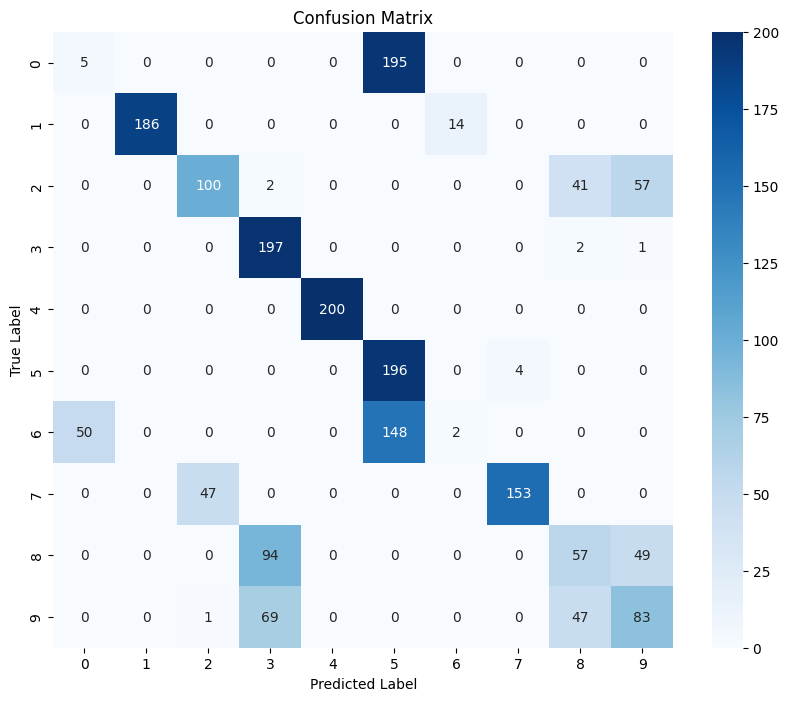

In [2]:
import scipy.io
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

def load_data_from_mat(path):
    train_data = []
    train_labels = []
    test_data = []
    test_labels = []

    for file in os.listdir(path):
        if file.startswith('test_5'):
            mat = scipy.io.loadmat(os.path.join(path, file))
            test_data.append(mat[list(mat.keys())[-2]])
            test_labels.append(mat[list(mat.keys())[-1]])

    # Concatenate all data and labels respectively
    test_data = np.concatenate(test_data, axis=0)
    test_labels = np.concatenate(test_labels, axis=0)

    # Normalize data
    test_data = test_data.astype('float32') / 255

    # Convert labels to categorical (one-hot encoding)
    test_labels = to_categorical(test_labels, 10)

    return test_data, test_labels

# 调用函数加载数据
path = '/Users/fuyao/Desktop/Thesis/about_database/generate_database'
test_data, test_labels = load_data_from_mat(path)


print('Test data shape:', test_data.shape)
print('Test labels shape:', test_labels.shape)

test_data_reshaped = test_data.reshape((-1, 32, 32, 3))

loaded_model = tf.keras.models.load_model('/Users/fuyao/Documents/GitHub/DL-based-RF-Fingerprints-Recognition/model/mobilenet0402-2-big.h5')
# 评估模型在测试集上的性能
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)

print(f'测试集损失: {test_loss}')
print(f'测试集准确率: {test_acc}')

# 确保在这里使用测试数据和测试标签
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# 预测测试数据集
predictions = loaded_model.predict(test_data_reshaped)
predicted_classes = np.argmax(predictions, axis=1)

# 计算并显示分类报告
report = classification_report(test_labels.argmax(axis=1), predicted_classes, target_names=[str(i) for i in range(10)])
print(report)

# 计算并绘制混淆矩阵
conf_matrix = confusion_matrix(test_labels.argmax(axis=1), predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



Test data shape: (2000, 3072)
Test labels shape: (2000, 10)
63/63 - 1s - 11ms/step - accuracy: 0.5940 - loss: 3.0416
测试集损失: 3.041578531265259
测试集准确率: 0.593999981880188
63/63 - 0s - 8ms/step - accuracy: 0.5940 - loss: 3.0416

Test accuracy: 0.593999981880188
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
              precision    recall  f1-score   support

           0       0.03      0.01      0.01       200
           1       1.00      0.98      0.99       200
           2       0.70      0.51      0.59       200
           3       0.55      1.00      0.71       200
           4       1.00      1.00      1.00       200
           5       0.35      1.00      0.52       200
           6       0.00      0.00      0.00       200
           7       1.00      0.78      0.88       200
           8       0.38      0.30      0.34       200
           9       0.41      0.36      0.39       200

    accuracy                           0.59      2000
   macro avg       0.54      0.59      0.54      2000

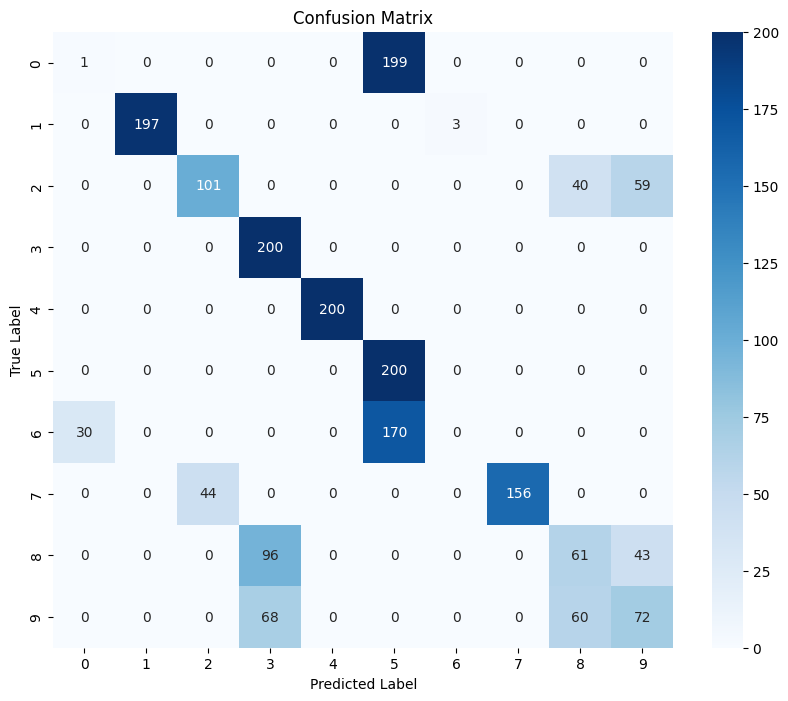

In [3]:
import scipy.io
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

def load_data_from_mat(path):
    train_data = []
    train_labels = []
    test_data = []
    test_labels = []

    for file in os.listdir(path):
        if file.startswith('test_10'):
            mat = scipy.io.loadmat(os.path.join(path, file))
            test_data.append(mat[list(mat.keys())[-2]])
            test_labels.append(mat[list(mat.keys())[-1]])

    # Concatenate all data and labels respectively
    test_data = np.concatenate(test_data, axis=0)
    test_labels = np.concatenate(test_labels, axis=0)

    # Normalize data
    test_data = test_data.astype('float32') / 255

    # Convert labels to categorical (one-hot encoding)
    test_labels = to_categorical(test_labels, 10)

    return test_data, test_labels

# 调用函数加载数据
path = '/Users/fuyao/Desktop/Thesis/about_database/generate_database'
test_data, test_labels = load_data_from_mat(path)


print('Test data shape:', test_data.shape)
print('Test labels shape:', test_labels.shape)

test_data_reshaped = test_data.reshape((-1, 32, 32, 3))

loaded_model = tf.keras.models.load_model('/Users/fuyao/Documents/GitHub/DL-based-RF-Fingerprints-Recognition/model/mobilenet0402-2-big.h5')
# 评估模型在测试集上的性能
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)

print(f'测试集损失: {test_loss}')
print(f'测试集准确率: {test_acc}')

# 确保在这里使用测试数据和测试标签
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# 预测测试数据集
predictions = loaded_model.predict(test_data_reshaped)
predicted_classes = np.argmax(predictions, axis=1)

# 计算并显示分类报告
report = classification_report(test_labels.argmax(axis=1), predicted_classes, target_names=[str(i) for i in range(10)])
print(report)

# 计算并绘制混淆矩阵
conf_matrix = confusion_matrix(test_labels.argmax(axis=1), predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



Test data shape: (2000, 3072)
Test labels shape: (2000, 10)
63/63 - 1s - 10ms/step - accuracy: 0.5890 - loss: 3.4062
测试集损失: 3.4061858654022217
测试集准确率: 0.5889999866485596
63/63 - 0s - 8ms/step - accuracy: 0.5890 - loss: 3.4062

Test accuracy: 0.5889999866485596
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       200
           1       1.00      1.00      1.00       200
           2       0.74      0.53      0.61       200
           3       0.51      1.00      0.68       200
           4       1.00      1.00      1.00       200
           5       0.34      1.00      0.51       200
           6       0.00      0.00      0.00       200
           7       1.00      0.81      0.90       200
           8       0.30      0.21      0.25       200
           9       0.41      0.34      0.37       200

    accuracy                           0.59      2000
   macro avg       0.53      0.59      0.53      2

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

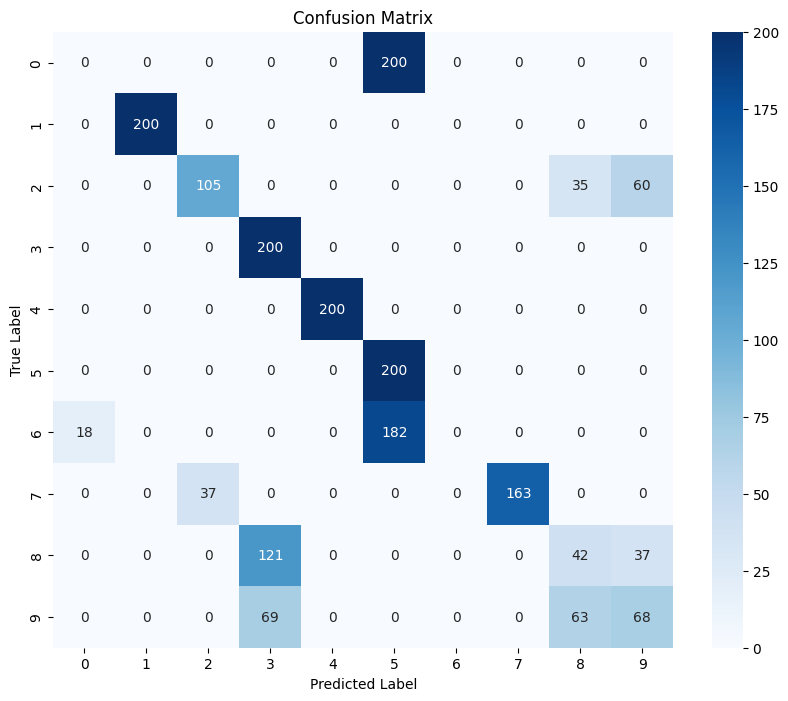

In [4]:
import scipy.io
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

def load_data_from_mat(path):
    train_data = []
    train_labels = []
    test_data = []
    test_labels = []

    for file in os.listdir(path):
        if file.startswith('test_15'):
            mat = scipy.io.loadmat(os.path.join(path, file))
            test_data.append(mat[list(mat.keys())[-2]])
            test_labels.append(mat[list(mat.keys())[-1]])

    # Concatenate all data and labels respectively
    test_data = np.concatenate(test_data, axis=0)
    test_labels = np.concatenate(test_labels, axis=0)

    # Normalize data
    test_data = test_data.astype('float32') / 255

    # Convert labels to categorical (one-hot encoding)
    test_labels = to_categorical(test_labels, 10)

    return test_data, test_labels

# 调用函数加载数据
path = '/Users/fuyao/Desktop/Thesis/about_database/generate_database'
test_data, test_labels = load_data_from_mat(path)


print('Test data shape:', test_data.shape)
print('Test labels shape:', test_labels.shape)

test_data_reshaped = test_data.reshape((-1, 32, 32, 3))

loaded_model = tf.keras.models.load_model('/Users/fuyao/Documents/GitHub/DL-based-RF-Fingerprints-Recognition/model/mobilenet0402-2-big.h5')
# 评估模型在测试集上的性能
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)

print(f'测试集损失: {test_loss}')
print(f'测试集准确率: {test_acc}')

# 确保在这里使用测试数据和测试标签
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# 预测测试数据集
predictions = loaded_model.predict(test_data_reshaped)
predicted_classes = np.argmax(predictions, axis=1)

# 计算并显示分类报告
report = classification_report(test_labels.argmax(axis=1), predicted_classes, target_names=[str(i) for i in range(10)])
print(report)

# 计算并绘制混淆矩阵
conf_matrix = confusion_matrix(test_labels.argmax(axis=1), predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



Test data shape: (2000, 3072)
Test labels shape: (2000, 10)
63/63 - 1s - 10ms/step - accuracy: 0.5835 - loss: 3.4649
测试集损失: 3.4648897647857666
测试集准确率: 0.5835000276565552
63/63 - 0s - 8ms/step - accuracy: 0.5835 - loss: 3.4649

Test accuracy: 0.5835000276565552
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       200
           1       1.00      1.00      1.00       200
           2       0.71      0.46      0.55       200
           3       0.51      1.00      0.67       200
           4       1.00      1.00      1.00       200
           5       0.34      1.00      0.51       200
           6       0.00      0.00      0.00       200
           7       1.00      0.81      0.90       200
           8       0.27      0.19      0.22       200
           9       0.43      0.38      0.40       200

    accuracy                           0.58      2000
   macro avg       0.53      0.58      0.53      2

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

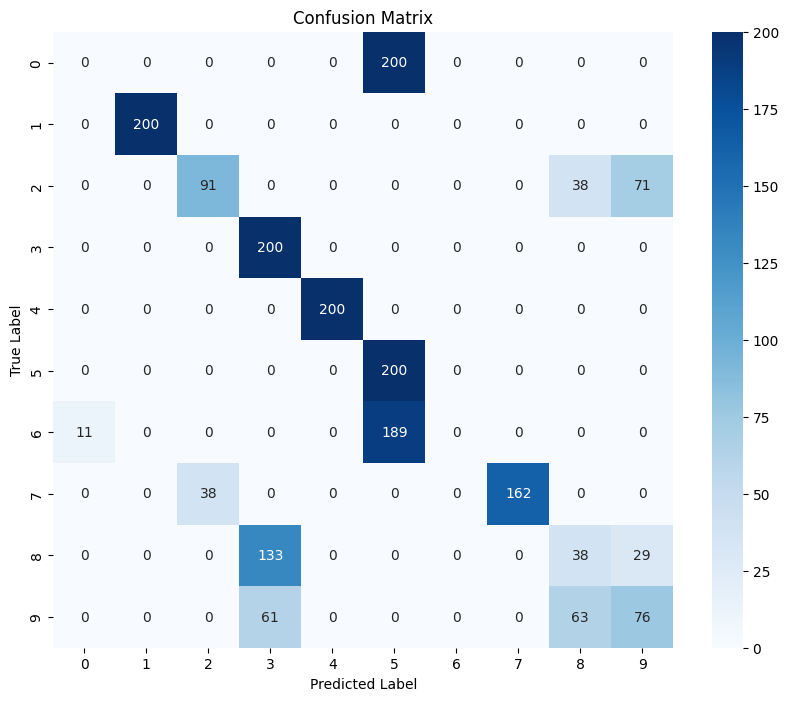

In [5]:
import scipy.io
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

def load_data_from_mat(path):
    test_data = []
    test_labels = []

    for file in os.listdir(path):
        if file.startswith('test_20'):
            mat = scipy.io.loadmat(os.path.join(path, file))
            test_data.append(mat[list(mat.keys())[-2]])
            test_labels.append(mat[list(mat.keys())[-1]])

    # Concatenate all data and labels respectively
    test_data = np.concatenate(test_data, axis=0)
    test_labels = np.concatenate(test_labels, axis=0)

    # Normalize data
    test_data = test_data.astype('float32') / 255

    # Convert labels to categorical (one-hot encoding)
    test_labels = to_categorical(test_labels, 10)

    return test_data, test_labels

# 调用函数加载数据
path = '/Users/fuyao/Desktop/Thesis/about_database/generate_database'
test_data, test_labels = load_data_from_mat(path)


print('Test data shape:', test_data.shape)
print('Test labels shape:', test_labels.shape)

test_data_reshaped = test_data.reshape((-1, 32, 32, 3))

loaded_model = tf.keras.models.load_model('/Users/fuyao/Documents/GitHub/DL-based-RF-Fingerprints-Recognition/model/mobilenet0402-2-big.h5')
# 评估模型在测试集上的性能
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)

print(f'测试集损失: {test_loss}')
print(f'测试集准确率: {test_acc}')

# 确保在这里使用测试数据和测试标签
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# 预测测试数据集
predictions = loaded_model.predict(test_data_reshaped)
predicted_classes = np.argmax(predictions, axis=1)

# 计算并显示分类报告
report = classification_report(test_labels.argmax(axis=1), predicted_classes, target_names=[str(i) for i in range(10)])
print(report)

# 计算并绘制混淆矩阵
conf_matrix = confusion_matrix(test_labels.argmax(axis=1), predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



Test data shape: (2000, 3072)
Test labels shape: (2000, 10)
63/63 - 1s - 10ms/step - accuracy: 0.5895 - loss: 3.4337
测试集损失: 3.4337244033813477
测试集准确率: 0.5895000100135803
63/63 - 0s - 7ms/step - accuracy: 0.5895 - loss: 3.4337

Test accuracy: 0.5895000100135803
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       200
           1       1.00      1.00      1.00       200
           2       0.72      0.47      0.56       200
           3       0.52      1.00      0.69       200
           4       1.00      1.00      1.00       200
           5       0.34      1.00      0.51       200
           6       0.00      0.00      0.00       200
           7       1.00      0.81      0.90       200
           8       0.35      0.28      0.31       200
           9       0.40      0.33      0.36       200

    accuracy                           0.59      2000
   macro avg       0.53      0.59      0.53      2

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

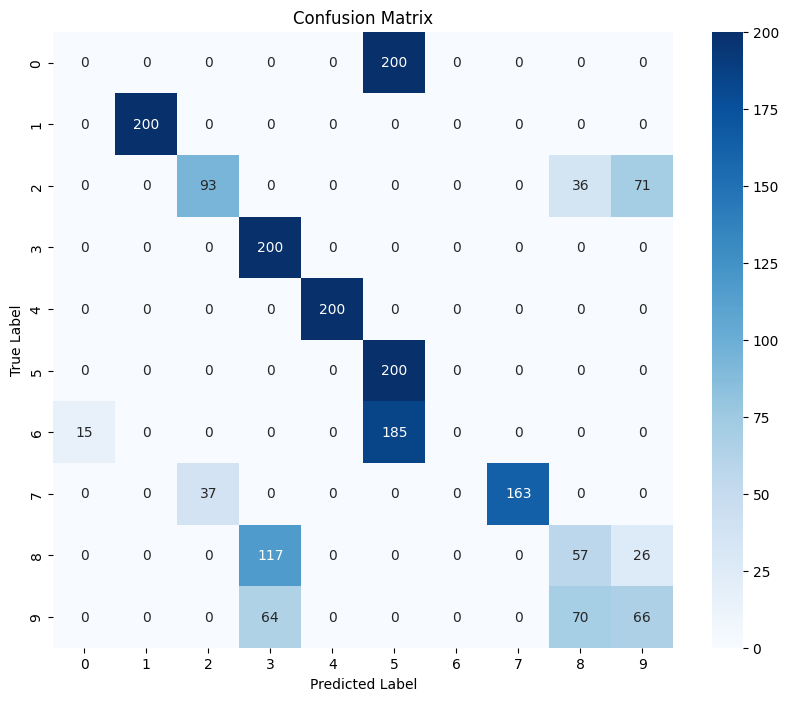

In [6]:
import scipy.io
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

def load_data_from_mat(path):
    train_data = []
    train_labels = []
    test_data = []
    test_labels = []

    for file in os.listdir(path):
        if file.startswith('test_25'):
            mat = scipy.io.loadmat(os.path.join(path, file))
            test_data.append(mat[list(mat.keys())[-2]])
            test_labels.append(mat[list(mat.keys())[-1]])

    # Concatenate all data and labels respectively
    test_data = np.concatenate(test_data, axis=0)
    test_labels = np.concatenate(test_labels, axis=0)

    # Normalize data
    test_data = test_data.astype('float32') / 255

    # Convert labels to categorical (one-hot encoding)
    test_labels = to_categorical(test_labels, 10)

    return test_data, test_labels

# 调用函数加载数据
path = '/Users/fuyao/Desktop/Thesis/about_database/generate_database'
test_data, test_labels = load_data_from_mat(path)


print('Test data shape:', test_data.shape)
print('Test labels shape:', test_labels.shape)

test_data_reshaped = test_data.reshape((-1, 32, 32, 3))

loaded_model = tf.keras.models.load_model('/Users/fuyao/Documents/GitHub/DL-based-RF-Fingerprints-Recognition/model/mobilenet0402-2-big.h5')
# 评估模型在测试集上的性能
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)

print(f'测试集损失: {test_loss}')
print(f'测试集准确率: {test_acc}')

# 确保在这里使用测试数据和测试标签
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# 预测测试数据集
predictions = loaded_model.predict(test_data_reshaped)
predicted_classes = np.argmax(predictions, axis=1)

# 计算并显示分类报告
report = classification_report(test_labels.argmax(axis=1), predicted_classes, target_names=[str(i) for i in range(10)])
print(report)

# 计算并绘制混淆矩阵
conf_matrix = confusion_matrix(test_labels.argmax(axis=1), predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



Test data shape: (2000, 3072)
Test labels shape: (2000, 10)
63/63 - 1s - 10ms/step - accuracy: 0.5915 - loss: 3.4069
测试集损失: 3.406867027282715
测试集准确率: 0.5914999842643738
63/63 - 1s - 8ms/step - accuracy: 0.5915 - loss: 3.4069

Test accuracy: 0.5914999842643738
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       200
           1       1.00      1.00      1.00       200
           2       0.71      0.46      0.55       200
           3       0.52      1.00      0.68       200
           4       1.00      1.00      1.00       200
           5       0.34      1.00      0.51       200
           6       0.00      0.00      0.00       200
           7       1.00      0.81      0.90       200
           8       0.36      0.29      0.32       200
           9       0.44      0.35      0.39       200

    accuracy                           0.59      2000
   macro avg       0.54      0.59      0.54      20

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

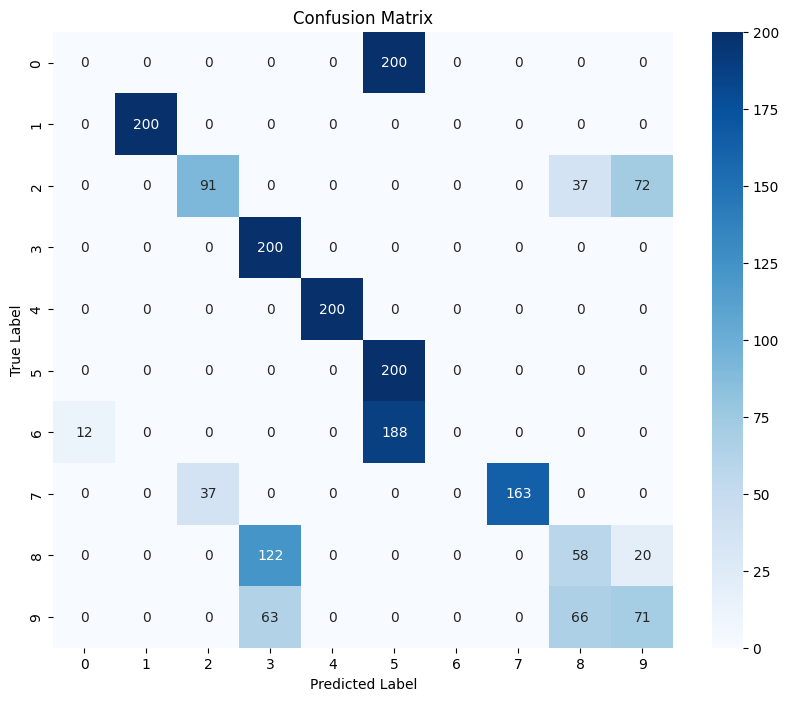

In [7]:
import scipy.io
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

def load_data_from_mat(path):
    train_data = []
    train_labels = []
    test_data = []
    test_labels = []

    for file in os.listdir(path):
        if file.startswith('test_30'):
            mat = scipy.io.loadmat(os.path.join(path, file))
            test_data.append(mat[list(mat.keys())[-2]])
            test_labels.append(mat[list(mat.keys())[-1]])

    # Concatenate all data and labels respectively
    test_data = np.concatenate(test_data, axis=0)
    test_labels = np.concatenate(test_labels, axis=0)

    # Normalize data
    test_data = test_data.astype('float32') / 255

    # Convert labels to categorical (one-hot encoding)
    test_labels = to_categorical(test_labels, 10)

    return test_data, test_labels

# 调用函数加载数据
path = '/Users/fuyao/Desktop/Thesis/about_database/generate_database'
test_data, test_labels = load_data_from_mat(path)


print('Test data shape:', test_data.shape)
print('Test labels shape:', test_labels.shape)

test_data_reshaped = test_data.reshape((-1, 32, 32, 3))

loaded_model = tf.keras.models.load_model('/Users/fuyao/Documents/GitHub/DL-based-RF-Fingerprints-Recognition/model/mobilenet0402-2-big.h5')
# 评估模型在测试集上的性能
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)

print(f'测试集损失: {test_loss}')
print(f'测试集准确率: {test_acc}')

# 确保在这里使用测试数据和测试标签
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# 预测测试数据集
predictions = loaded_model.predict(test_data_reshaped)
predicted_classes = np.argmax(predictions, axis=1)

# 计算并显示分类报告
report = classification_report(test_labels.argmax(axis=1), predicted_classes, target_names=[str(i) for i in range(10)])
print(report)

# 计算并绘制混淆矩阵
conf_matrix = confusion_matrix(test_labels.argmax(axis=1), predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

